In [479]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='ticks')
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, '../../induction_analysis')

import Analysis.induction_analysis as ia
import Analysis.induction_plots as ip
import Analysis.comparison_plots as cp
from Analysis import filters

from lab_repo.classes.place_cell_classes import pcExperimentGroup
import lab_repo.analysis.behavior_analysis as ba
from lab_repo.misc.misc import calc_cdf

from Experiments import LEDExperiment

import numpy as np
import pandas as pd

from scipy.stats import pearsonr, spearmanr, ttest_ind, ttest_1samp, mannwhitneyu, wilcoxon, ttest_rel

In [20]:
data_dir = '/home/sebi/data/induction/fig2/'
save_dir = '/home/sebi/plots/ind/fig2/'
supp_dir = '/home/sebi/plots/ind/figs2/'

In [21]:
# Initialize Sparse LED Induction Group

mice = ['svr141', 'svr142', 'svr143', 'svr146', 'svr147', 'svr148'] + ['svr153', 'svr154', 'svr157', 'svr159', 'svr160', 'svr161', 'svr162', 'svr164']
ind_expt_ids = [22362, 22365, 22140, 22716, 22725, 22727] + [22754, 22755, 23227, 23853, 23882, 23875, 23834, 23866] + [25002, 25020, 25030, 25035]

expts = [LEDExperiment.LEDExperiment(x) for x in ind_expt_ids]
pc_kwargs = {'imaging_label': 'suite2p',
                         'nPositionBins': 100,
                         'channel': 'Ch2',
                         'demixed': False,
                         'pf_subset': None,
                         'signal': 'spikes'}

grp = pcExperimentGroup(expts, label='sparse_led', **pc_kwargs)

filter_overwrite = False

stim_filter = filters.grp_stim_filter(grp, label='suite2p', overwrite=filter_overwrite, activity_filter=True)
ind_filter = filters.grp_induction_filter(grp, stim_filter=stim_filter, overwrite=filter_overwrite)
nostim_filter = filters.grp_unstimmed_filter(grp, exclude_baseline_stim=True, overwrite=filter_overwrite)
nostim_ind_filter = filters.grp_unstimmed_formation_filter(grp, stim_filter=nostim_filter, overwrite=filter_overwrite)

## Plots

In [26]:
# Setup
from matplotlib import rc
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['axes.labelsize'] = 7
plt.rcParams['boxplot.boxprops.linewidth'] = 1

rc('font',**{'family':'sans-serif','sans-serif':['helvetica', 'sans-serif']})
plt.rcParams['axes.unicode_minus'] = False

def clean(ax, full=False, offset=0):
    if full:
        sns.despine(ax=ax, left=True, bottom=True, offset=offset)
        ax.set_yticks([])
        ax.set_xticks([])
    else:
        sns.despine(ax=ax, offset=offset)

### Activity Centroids

In [27]:
colors = ['rouge']
colors = ['#ef6e4b'] + sns.xkcd_palette(colors)
labels = ['Low', 'Mid']

In [33]:
# Group by experiment and then median split
grouped_df = activity_centroid_split_df.groupby(['expt_id', 'mouse_name', 'split'], as_index=False).mean()
grouped_df = grouped_df.merge(ind_rate, left_on=['mouse_name', 'expt_id'],
                                          right_on=['mouse', 'expt'])
grouped_df['count'] = grouped_df['pct_stimmed'] * 100

colors = ['rouge']
colors = ['#ef6e4b'] + sns.xkcd_palette(colors)
labels = ['Low', 'Mid']

(0.4899181333407362, 0.03903116277370657)
SpearmanrResult(correlation=0.5562435500515995, pvalue=0.016518403054404888)


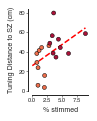

In [34]:
fig = plt.figure(figsize=(1, 1.5))
ax = fig.add_subplot(111)

sns.scatterplot(y='abs_dist', x='count', hue='split', palette=colors,
                    data=grouped_df, linewidth=0.5, edgecolor='k', s=16, ax=ax)
clean(ax, offset=4)


ax.get_legend().remove()
ax.set_xlabel('% stimmed')
ax.set_ylabel('Tuning Distance to SZ (cm)')

# Plot trendlines
max_count = grouped_df['count'].max()

pfit = np.polyfit(x=grouped_df['count'].values[:], y=grouped_df['abs_dist'].values[:], deg=1)
x = np.linspace(0, max_count, 3)
y = x * pfit[0] + pfit[1]
ax.plot(x, y, color='r', zorder=0, ls='--')

ax.set_ylim([0, ax.get_ylim()[-1]])
ax.set_xlim([0, ax.get_xlim()[-1]])
ax.set_xticks([0, 2.5, 5, 7.5]);

# fig.savefig(save_dir + 'activity_centroid_vs_pct.svg')

print pearsonr(grouped_df['abs_dist'], grouped_df['count'])
print spearmanr(grouped_df['abs_dist'], grouped_df['count'])

In [235]:
grouped_df['count'].median()

2.857064420233585

In [ ]:
### Activity Centroids

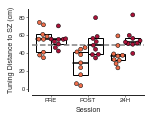

In [167]:
fig = plt.figure(figsize=(2, 1.5))
ax = fig.add_subplot(111)


grouped_df = activity_centroid_split_df.groupby(['expt_id', 'mouse_name', 'split', 'session'], as_index=False).mean()

sns.boxplot(x='session', y='abs_dist', hue='split', data=grouped_df, order=sessions,
            ax=ax, whis=False, showcaps=False, showfliers=False)
plt.setp(ax.artists, edgecolor='k', facecolor='w', linewidth=1)
plt.setp(ax.lines, color='k')

sns.swarmplot(x='session', y='abs_dist', hue='split', data=grouped_df, palette=colors,
              order=sessions, hue_order=labels, ax=ax, size=4, dodge=True,
              edgecolor='k', linewidth=0.5, alpha=1)

ax.get_legend().remove()

clean(ax, offset=4)
ax.set_xlabel('Session')
ax.set_ylabel('Tuning Distance to SZ (cm)')

ax.axhline(194./4, color='0.5', ls='--')

fig.savefig(save_dir + 'activity_centroids.svg')

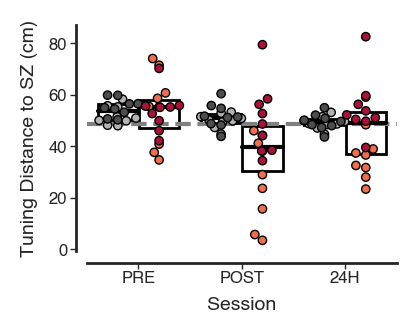

In [118]:
# For Supplement: Compare to unstimulated cells
fig = plt.figure(figsize=(2, 1.5), dpi=200)
ax = fig.add_subplot(111)

sessions = ['PRE', 'POST', '24H']

grouped_df = full_activity_centroid_df.groupby(['expt_id', 'mouse_name', 'class', 'session', 'stimmed'], as_index=False).mean()

sns.boxplot(x='session', y='abs_dist', hue='stimmed', data=grouped_df, order=sessions, hue_order=['unstimmed', 'stimmed'],
            ax=ax, whis=False, showcaps=False, showfliers=False)
plt.setp(ax.artists, edgecolor='k', facecolor='w', linewidth=1)
plt.setp(ax.lines, color='k')

sns.swarmplot(x='session', y='abs_dist', hue='stimmed', data=grouped_df.loc[grouped_df['class'] == 'Low'],
              palette=['0.7', colors[0]],
              order=sessions, hue_order=['unstimmed', 'stimmed'], ax=ax, size=3, dodge=True,
              edgecolor='k', linewidth=0.5, alpha=1)
sns.swarmplot(x='session', y='abs_dist', hue='stimmed', data=grouped_df.loc[grouped_df['class'] == 'Med'],
              palette=['0.3', colors[1]],
              order=sessions, hue_order=['unstimmed', 'stimmed'], ax=ax, size=3, dodge=True,
              edgecolor='k', linewidth=0.5, alpha=1)

ax.get_legend().remove()

clean(ax, offset=4)
ax.set_xlabel('Session')
ax.set_ylabel('Tuning Distance to SZ (cm)')

ax.axhline(194./4, color='0.5', ls='--')

fig.savefig(supp_dir + 'activity_centroids.svg')

In [120]:
a = grouped_df.loc[(grouped_df['stimmed'] == 'unstimmed') & (grouped_df['session'] == 'PRE') & (grouped_df['class'] == 'Low')]['abs_dist']
b = grouped_df.loc[(grouped_df['stimmed'] == 'stimmed') & (grouped_df['session'] == 'PRE') & (grouped_df['class'] == 'Low')]['abs_dist']
c = grouped_df.loc[(grouped_df['stimmed'] == 'unstimmed') & (grouped_df['session'] == 'POST') & (grouped_df['class'] == 'Low')]['abs_dist']
d = grouped_df.loc[(grouped_df['stimmed'] == 'stimmed') & (grouped_df['session'] == 'POST') & (grouped_df['class'] == 'Low')]['abs_dist']
e = grouped_df.loc[(grouped_df['stimmed'] == 'unstimmed') & (grouped_df['session'] == '24H') & (grouped_df['class'] == 'Low')]['abs_dist']
f = grouped_df.loc[(grouped_df['stimmed'] == 'stimmed') & (grouped_df['session'] == '24H') & (grouped_df['class'] == 'Low')]['abs_dist']

print ttest_rel(a, b)
print ttest_rel(c, d)
print ttest_rel(e, f)

Ttest_relResult(statistic=-0.444122488143675, pvalue=0.6687219687682924)
Ttest_relResult(statistic=3.799258136299223, pvalue=0.00524219947572386)
Ttest_relResult(statistic=2.8371484541302103, pvalue=0.021907870391097692)


### Shifts

27.4646115941 6.543420496848583
0.0874505587493 4.423920730918015
Ttest_indResult(statistic=3.466090317742561, pvalue=0.0031835565186186894)
Ttest_1sampResult(statistic=4.1972866648801705, pvalue=0.003007645089449433)
Ttest_1sampResult(statistic=0.019767659519323806, pvalue=0.9847128508783902)


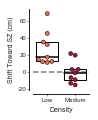

In [242]:
shift_df = activity_centroid_split_df.loc[(activity_centroid_split_df['session'] == 'POST')].merge(
    activity_centroid_split_df.loc[(activity_centroid_split_df['session'] == 'PRE')],
    on=['roi', 'mouse_name', 'split'],
    suffixes=['_ind', '_base'])

shift_df['shift'] = shift_df.apply(lambda x: x['abs_dist_base'] - x['abs_dist_ind'], axis=1)

grp_df = shift_df.groupby(['mouse_name', 'expt_id_ind', 'split'], as_index=False).mean()

fig = plt.figure(figsize=(1, 1.5))
ax = fig.add_subplot(111)

sns.boxplot(x='split', y='shift', data=grp_df,
            ax=ax,
            whis=False, showcaps=False, showfliers=False)
plt.setp(ax.artists, edgecolor='k', facecolor='w', linewidth=1)
plt.setp(ax.lines, color='k')

sns.swarmplot(x='split', y='shift', hue='split', data=grp_df, palette=colors,
              order=labels, hue_order=labels, ax=ax, size=4,
              edgecolor='k', linewidth=0.5, alpha=1)

ax.get_legend().remove()

clean(ax, offset=4)
ax.set_ylabel('Shift Toward SZ (cm)')
ax.set_xlabel('Density')
ax.set_xticklabels(['Low', 'Medium'])

ax.axhline(0, color='0.5', ls='--')

fig.savefig(save_dir + 'shift.svg')

# fig.savefig(save_path + 'activity_centroid_shift_comparison.{}'.format(FILE_ENDING), bbox_inches='tight')

# Stats
low_df = grp_df.loc[grp_df['split'] == 'Low'].dropna()
mid_df = grp_df.loc[grp_df['split'] == 'Mid'].dropna()

print low_df['shift'].mean(), low_df['shift'].sem()
print mid_df['shift'].mean(), mid_df['shift'].sem()

print ttest_ind(low_df['shift'], mid_df['shift'])
print ttest_1samp(low_df['shift'], 0)
print ttest_1samp(mid_df['shift'], 0)

# print 'Activity Centroid Shift: Control Mean={}, CNO Mean={}, p={}'.format(
#     control_df.mean()['shift'], cno_df.mean()['shift'], pval)

Ttest_relResult(statistic=-3.5918515271515465, pvalue=0.007065448191365913)
Ttest_relResult(statistic=0.8192092395985484, pvalue=0.43638988589439554)


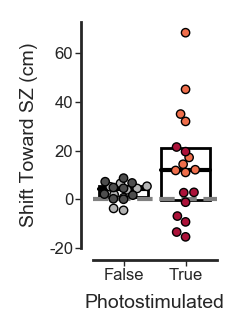

In [480]:
# For Supplement: Compare to unstimulated cells

shift_df = full_activity_centroid_df.loc[(full_activity_centroid_df['session'] == 'POST')].merge(
    full_activity_centroid_df.loc[(full_activity_centroid_df['session'] == 'PRE')],
    on=['roi', 'mouse_name', 'class', 'stimmed'],
    suffixes=['_ind', '_base'])

shift_df['shift'] = shift_df.apply(lambda x: x['abs_dist_base'] - x['abs_dist_ind'], axis=1)

grp_df = shift_df.groupby(['mouse_name', 'expt_id_ind', 'class', 'stimmed'], as_index=False).mean()

fig = plt.figure(figsize=(0.8, 1.5), dpi=200)
ax = fig.add_subplot(111)

sns.boxplot(x='stimmed', y='shift', data=grp_df,
            ax=ax, order=['unstimmed', 'stimmed'],
            whis=False, showcaps=False, showfliers=False)
plt.setp(ax.artists, edgecolor='k', facecolor='w', linewidth=1)
plt.setp(ax.lines, color='k')

sns.swarmplot(x='stimmed', y='shift', hue='stimmed', data=grp_df.loc[grp_df['class'] == 'Low'], palette=['0.7', colors[0]],
              order=['unstimmed', 'stimmed'], hue_order=['unstimmed', 'stimmed'], ax=ax, size=3,
              edgecolor='k', linewidth=0.5, alpha=1)
sns.swarmplot(x='stimmed', y='shift', hue='stimmed', data=grp_df.loc[grp_df['class'] == 'Med'], palette=['0.3', colors[1]],
              order=['unstimmed', 'stimmed'], hue_order=['unstimmed', 'stimmed'], ax=ax, size=3,
              edgecolor='k', linewidth=0.5, alpha=1)

ax.get_legend().remove()

clean(ax, offset=4)
ax.set_ylabel('Shift Toward SZ (cm)')
ax.set_xlabel('Photostimulated')
ax.set_xticklabels(['False', 'True'])

ax.axhline(0, color='0.5', ls='--')

a = grp_df.loc[(grp_df['stimmed'] == 'unstimmed') & (grp_df['class'] == 'Low')]['shift']
b = grp_df.loc[(grp_df['stimmed'] == 'stimmed') & (grp_df['class'] == 'Low')]['shift']
c = grp_df.loc[(grp_df['stimmed'] == 'unstimmed') & (grp_df['class'] == 'Med')]['shift']
d = grp_df.loc[(grp_df['stimmed'] == 'stimmed') & (grp_df['class'] == 'Med')]['shift']

print ttest_rel(a, b)
print ttest_rel(c, d)

fig.savefig(supp_dir + 'shifts.svg')

### Induction Rate

Ttest_indResult(statistic=2.489149885258323, pvalue=0.024196396659214203)
MannwhitneyuResult(statistic=19.0, pvalue=0.030276033906585908)


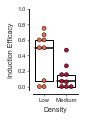

In [472]:
ind_rate = pd.read_pickle(data_dir + 'ind_rate.pkl')
grp_df = activity_centroid_split_df.groupby(['expt_id', 'mouse_name', 'split'], as_index=False).mean()
grp_df = grp_df.merge(ind_rate, left_on=['mouse_name', 'expt_id'],
                                          right_on=['mouse', 'expt'])

fig = plt.figure(figsize=(0.8, 1.5))
ax = fig.add_subplot(111)

sns.boxplot(x='split', y='pct_success', data=grp_df,
            ax=ax,
            whis=False, showcaps=False, showfliers=False)
plt.setp(ax.artists, edgecolor='k', facecolor='w', linewidth=1)
plt.setp(ax.lines, color='k')

sns.swarmplot(x='split', y='pct_success', hue='split', data=grp_df, palette=colors,
              order=labels, hue_order=labels, ax=ax, size=4,
              edgecolor='k', linewidth=0.5, alpha=1)

ax.get_legend().remove()

clean(ax, offset=4)
ax.set_ylabel('Induction Efficacy')
ax.set_xlabel('Density')
ax.set_xticklabels(['Low', 'Medium'])
ax.set_ylim([-0.05, 1])

# fig.savefig(save_dir + 'efficacy.svg')
low_df = grp_df.loc[grp_df['split'] == 'Low'].dropna()
mid_df = grp_df.loc[grp_df['split'] == 'Mid'].dropna()

print ttest_ind(low_df['pct_success'], mid_df['pct_success'])
print mannwhitneyu(low_df['pct_success'], mid_df['pct_success'])

In [22]:
print ttest_1samp(low_df['pct_success'], 0)
print ttest_1samp(mid_df['pct_success'], 0)

Ttest_1sampResult(statistic=4.11251783549366, pvalue=0.00337887882368994)
Ttest_1sampResult(statistic=2.509988939194144, pvalue=0.0363715588088957)


In [475]:
def pct_success(x):
    if x['stimmed'] == 'stimmed':
        return x['pct_success']
    else:
        return x['pct_success_control']

WilcoxonResult(statistic=6.0, pvalue=0.050612432239184685)
WilcoxonResult(statistic=19.0, pvalue=0.6784023758521882)


/home/sebi/.local/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/sebi/.local/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


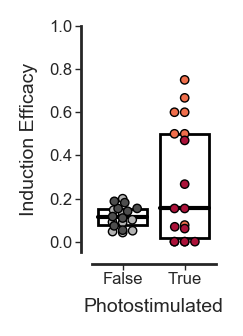

In [484]:
# For supplementary: Compare to Unstimmed
grp_df = full_activity_centroid_df.groupby(['expt_id', 'mouse_name', 'class', 'session', 'stimmed'], as_index=False).mean()
grp_df = grp_df.merge(ind_rate, left_on=['mouse_name', 'expt_id'],
                                          right_on=['mouse', 'expt'])
grp_df['pct_success'] = grp_df.apply(pct_success, axis=1)

fig = plt.figure(figsize=(0.8, 1.5), dpi=200)
ax = fig.add_subplot(111)

sns.boxplot(x='stimmed', y='pct_success', data=grp_df,
            ax=ax, order=['unstimmed', 'stimmed'],
            whis=False, showcaps=False, showfliers=False)
plt.setp(ax.artists, edgecolor='k', facecolor='w', linewidth=1)
plt.setp(ax.lines, color='k')

sns.swarmplot(x='stimmed', y='pct_success', hue='stimmed', data=grp_df.loc[grp_df['class'] == 'Low'],
              palette=['0.7', colors[0]],
              order=['unstimmed', 'stimmed'], hue_order=['unstimmed', 'stimmed'], ax=ax, size=3,
              edgecolor='k', linewidth=0.5, alpha=1)
sns.swarmplot(x='stimmed', y='pct_success', hue='stimmed', data=grp_df.loc[grp_df['class'] == 'Med'],
              palette=['0.3', colors[1]],
              order=['unstimmed', 'stimmed'], hue_order=['unstimmed', 'stimmed'], ax=ax, size=3,
              edgecolor='k', linewidth=0.5, alpha=1)

ax.get_legend().remove()

clean(ax, offset=4)
ax.set_ylabel('Induction Efficacy')
ax.set_xlabel('Photostimulated')
ax.set_xticklabels(['False', 'True'])
ax.set_ylim([-0.05, 1])

# fig.savefig(supp_dir + 'efficacy.svg')


a = grp_df.loc[(grp_df['stimmed'] == 'unstimmed') & (grp_df['class'] == 'Low')]['pct_success'].dropna()
b = grp_df.loc[(grp_df['stimmed'] == 'stimmed') & (grp_df['class'] == 'Low')]['pct_success'].dropna()

c = grp_df.loc[(grp_df['stimmed'] == 'unstimmed') & (grp_df['class'] == 'Med')]['pct_success'].dropna()
d = grp_df.loc[(grp_df['stimmed'] == 'stimmed') & (grp_df['class'] == 'Med')]['pct_success'].dropna()

print wilcoxon(a, b)
print wilcoxon(c, d)

### Induction Rate

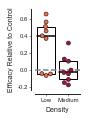

In [477]:
grp_df = activity_centroid_split_df.groupby(['expt_id', 'mouse_name', 'split'], as_index=False).mean()
grp_df = grp_df.merge(ind_rate, left_on=['mouse_name', 'expt_id'],
                                          right_on=['mouse', 'expt'])

grp_df['delta'] = grp_df['pct_success'] - grp_df['pct_success_control']

fig = plt.figure(figsize=(0.8, 1.5))
ax = fig.add_subplot(111)

sns.boxplot(x='split', y='delta', data=grp_df,
            ax=ax,
            whis=False, showcaps=False, showfliers=False)
plt.setp(ax.artists, edgecolor='k', facecolor='w', linewidth=1)
plt.setp(ax.lines, color='k')

sns.swarmplot(x='split', y='delta', hue='split', data=grp_df, palette=colors,
              order=labels, hue_order=labels, ax=ax, size=4,
              edgecolor='k', linewidth=0.5, alpha=1)

ax.get_legend().remove()

clean(ax, offset=4)
ax.set_ylabel('Efficacy Relative to Control')
ax.set_xlabel('Density')
ax.set_xticklabels(['Low', 'Medium'])

ax.axhline(0, color='0.5', ls='--')

fig.savefig(save_dir + 'induction_rate_delta.svg')

In [49]:
print ttest_1samp(grp_df.loc[grp_df['split'] == 'Low']['delta'], 0)
print ttest_1samp(grp_df.loc[grp_df['split'] == 'Mid']['delta'], 0)

Ttest_1sampResult(statistic=3.2403453327887966, pvalue=0.011871487644698711)
Ttest_1sampResult(statistic=0.009167808207703609, pvalue=0.9929097468195025)


### Stim Response

In [552]:
def roi_type(x):
    class roi(object):
        pass
    roi_obj = roi()
    roi_obj.label = x['roi']
    if ind_filter(roi_obj):
        return 'Induced'
    elif stim_filter(roi_obj) and not ind_filter(roi_obj):
        return 'Not Induced'
    else:
        return 'other'

6.79148255071 0.47913240300313087
5.35939592684 0.22410412923653095
Ttest_indResult(statistic=2.9176091081434596, pvalue=0.0038549863309761006)


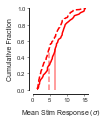

In [560]:
burst_df['ind'] = burst_df.apply(roi_type, axis=1)
ind_df = burst_df.loc[burst_df['ind'] == 'Induced']
fail_df = burst_df.loc[burst_df['ind'] == 'Not Induced']
df = pd.concat([ind_df, fail_df])

fig = plt.figure(figsize=(1, 1.5))
ax = fig.add_subplot(111)

bins, cdf_vals = calc_cdf(ax, ind_df['zdiff'], color='r', label='Induced')
ax.vlines(ip.get_med(cdf_vals, bins), 0, 0.5, linestyles='-', color='r', alpha=0.5)

bins, cdf_vals = calc_cdf(ax, fail_df['zdiff'], color='r', label='Not Induced', ls='--')
ax.vlines(ip.get_med(cdf_vals, bins), 0, 0.5, linestyles='--', color='r', alpha=0.5)

clean(ax, offset=4)
ax.set_ylabel('Cumulative Fraction')
ax.set_xlabel(r'Mean Stim Response ($\sigma$)')
ax.set_xticks([0, 5, 10, 15]);

fig.savefig(save_dir + 'stim_response.svg')

print ind_df['zdiff'].mean(), ind_df['zdiff'].sem()
print fail_df['zdiff'].mean(), fail_df['zdiff'].sem()
print ttest_ind(ind_df['zdiff'], fail_df['zdiff'])

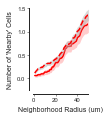

In [567]:
fig = plt.figure(figsize=(1, 1.5))
ax = fig.add_subplot(111)

cutoff = 50

ind_means = mean_dist.loc[mean_dist['ind']].groupby('thresh').mean()['close_cells'].values[:cutoff]
ind_sems = mean_dist.loc[mean_dist['ind']].groupby('thresh').sem()['close_cells'].values[:cutoff]
stim_means = mean_dist.loc[~mean_dist['ind']].groupby('thresh').mean()['close_cells'].values[:cutoff]
stim_sems = mean_dist.loc[~mean_dist['ind']].groupby('thresh').sem()['close_cells'].values[:cutoff]

T = range(1, cutoff + 1)
ax.fill_between(T, ind_means - ind_sems, ind_means + ind_sems, color='r', alpha=0.2, linewidth=0, zorder=0)
ax.plot(T, ind_means, color='r', zorder=1)

ax.fill_between(T, stim_means - stim_sems, stim_means + stim_sems, facecolor='0.7', edgecolor='0.7', alpha=0.5, linewidth=0, zorder=2)
ax.plot(T, stim_means, color='r', linestyle='--', zorder=3)

ax.set_xlim([-1, 50])
ax.set_ylim([-0.25, 1.5])
ax.set_yticks([0, 0.5, 1, 1.5])

clean(ax, offset=4)
ax.set_xlabel('Neighborhood Radius (um)')
ax.set_ylabel('Number of \'Nearby\' Cells')

fig.savefig(save_dir + 'neighborhood_density.svg')

# fig.savefig('/home/sebi/plots/ind/sparse_led/nearby_cells.svg', bbox_inches='tight')
# plt.tight_layout()

In [26]:
all_ind = mean_dist.loc[mean_dist['ind']]
all_stim = mean_dist.loc[~mean_dist['ind']]

pvals = []
for thresh in xrange(1, 200):
    
    pvals.append(ttest_ind(all_ind.loc[all_ind['thresh'] == thresh]['close_cells'],
                           all_stim.loc[all_stim['thresh'] == thresh]['close_cells'])[1])

sig = np.array(pvals)
sig[sig >= 0.05] = np.nan
sig[sig < 0.05] = 1

print np.where(np.array(pvals) < 0.05)

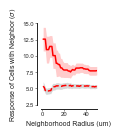

In [568]:
data_list = []
ind_means = []
ind_sems = []

stim_means = []
stim_sems = []
for i in xrange(1, 51):
    thresh_dist = mean_dist.loc[(mean_dist['thresh'] == i) & mean_dist['any_close_cells']]
    merge_df = thresh_dist.merge(burst_df, on=['mouse_name', 'expt_id', 'roi'], suffixes=['', '_'])
    
    ind_df = merge_df.loc[merge_df['ind']]
    ind_means.append(ind_df.mean()['zdiff'])
    ind_sems.append(ind_df.sem()['zdiff'])
    
    stim_df = merge_df.loc[~merge_df['ind']]
    stim_means.append(stim_df.mean()['zdiff'])
    stim_sems.append(stim_df.sem()['zdiff'])
    
ind_means = np.array(ind_means)
ind_sems = np.array(ind_sems)
stim_means = np.array(stim_means)
stim_sems = np.array(stim_sems)

fig = plt.figure(figsize=(1, 1.5))
ax = fig.add_subplot(111)

cutoff = 50
T = range(1, cutoff + 1)
ax.fill_between(T, ind_means - ind_sems, ind_means + ind_sems, color='r', alpha=0.2, linewidth=0, zorder=0)
ax.plot(T, ind_means, color='r', zorder=1)

ax.fill_between(T, stim_means - stim_sems, stim_means + stim_sems, facecolor='0.7', edgecolor='0.7', alpha=0.5, linewidth=0, zorder=2)
ax.plot(T, stim_means, color='r', linestyle='--', zorder=3)

ax.set_xlim([-1, 50])
ax.set_ylim([2.5, 15])
# ax.set_yticks([0, 0.5, 1, 1.5])

clean(ax, offset=4)
ax.set_xlabel('Neighborhood Radius (um)')
ax.set_ylabel(r'Response of Cells with Neighbor ($\sigma$)')

fig.savefig(save_dir + 'neighborhood_stim_response.svg')


In [85]:
# For Supplementary: PSTH for each group

low_stims = []
low_nostims = []
med_stims = []
med_nostims = []
for expt in low_grp:
    _, psths = ia.psth(expt, roi_filter=stim_filter, pre=2, post=4)
    low_stims.append(psths)
    _, psths = ia.psth(expt, roi_filter=nostim_filter, pre=2, post=4)
    low_nostims.append(psths)

for expt in mid_grp:
    _, psths = ia.psth(expt, roi_filter=stim_filter, pre=2, post=4)
    med_stims.append(psths)
    T, psths = ia.psth(expt, roi_filter=nostim_filter, pre=2, post=4)
    med_nostims.append(psths)

In [89]:
low_stim_psths = np.vstack([np.nanmean(x, axis=0) for x in low_stims])
low_nostim_psths = np.vstack([np.nanmean(x, axis=0) for x in low_nostims])

med_stim_psths = np.vstack([np.nanmean(x, axis=0) for x in med_stims])
med_nostim_psths = np.vstack([np.nanmean(x, axis=0) for x in med_nostims])

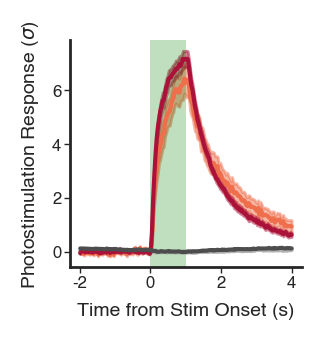

In [112]:
plot_colors = [colors[0], '0.7', colors[1], '0.3']
fig = plt.figure(figsize=(1.5, 1.5), dpi=200)
ax = fig.add_subplot(111)

ax.axvspan(0, 1, color='g', alpha=0.25, lw=0)

for color, psths in zip(plot_colors, [low_stim_psths, low_nostim_psths, med_stim_psths, med_nostim_psths]):
    
    means = np.nanmean(psths, axis=0)
    stds = sem(psths, axis=0, nan_policy='omit')
    
    ax.plot(T, means, color=color)
    ax.fill_between(x=T, y1=means-stds, y2=means+stds, color=color, alpha=0.5)
    
clean(ax)
ax.set_xlabel('Time from Stim Onset (s)')
ax.set_ylabel(r'Photostimulation Response ($\sigma$)')

fig.savefig(supp_dir + 'psths.svg')

In [121]:
for x in [low_stim_psths, low_nostim_psths, med_stim_psths, med_nostim_psths]:
    print x.shape

(43, 178)
(2395, 178)
(204, 178)
(3245, 178)


In [104]:
with open(save_dir + 'psths.pkl', 'wb') as fw:
    pkl.dump([low_stim_psths, low_nostim_psths, med_stim_psths, med_nostim_psths], fw)

### Examples

In [97]:
pc_filter = grp.pcs_filter(roi_filter=nostim_filter)

94


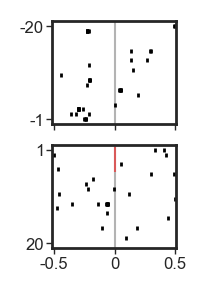

In [390]:
fig = plt.figure(figsize=(0.8, 1.5), dpi=200)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


# roi_filter = lambda x: (not ind_filter(x)) and stim_filter(x) # 10, 13
roi_filter = lambda x: (not pc_filter(x)) and nostim_filter(x) # 88
# def new_pc_filter(expt, pre_filter):
#     rois = expt.rois()
#     labels = [r.label for r in rois if pre_filter(r)]
#     return lambda x: x.label in labels
# roi_filter = new_pc_filter(expt, pc_filter) # 91,
# roi_filter = ind_filter # successes: 12, 18

cell_idx = 21

expt = grp[15]
print len(expt.rois(roi_filter=roi_filter))
spikes = expt.spikes(binary=True, roi_filter=roi_filter)[cell_idx, ...]

abspos = ba.absolutePosition(expt.find('trial'))
pos = ((abspos * 100).astype(int) / 100.) % 1 # relative position rounded to two decimals
laps = abspos.astype(int)
running = expt.velocity()[0] > 1

# Baseline Info
bexpt = base_grp[15]
bspikes = bexpt.spikes(binary=True, roi_filter=roi_filter)[cell_idx, ...]
babspos = ba.absolutePosition(bexpt.find('trial'))
bpos = ((babspos * 100).astype(int) / 100.) % 1
blaps = babspos.astype(int)
brunning = bexpt.velocity()[0] > 1

shift = (50-int(expt._get_stim_positions(units='normalized')[0]))/100.

# Plot last 20 laps of baseline session
ax1.axvline(.5, color='0.7', lw=0.75)
spike_idx = np.where(bspikes)[0]
n_laps = blaps[-1]
start_lap = n_laps - n_lap_display - 1

for spike_i in spike_idx:
    if not brunning[spike_i]:
        continue
    lap = int(babspos[spike_i])
    if lap <= start_lap:
        continue
    elif lap == n_laps:
        break
    pos = (babspos[spike_i] + shift) % 1
    ax1.plot(pos, start_lap-lap, marker='|', color='k', ms=1.5)

ax1.set_xlim([-0.01, 1])
ax1.set_xticks([0, .50, .99])
ax1.set_xticklabels([])
ax1.set_yticks([-1, -n_lap_display])
ax1.set_yticklabels([-n_lap_display, -1])
ax1.set_ylim([-n_lap_display - 1, 0])


# Plot first 20 laps of induction session
ax2.axvline(.5, color='0.7', lw=0.75)
ax2.vlines(x=0.5, ymin=-5.5, ymax=-0.5, color='r', alpha=0.5, zorder=100, lw=0.75)

spike_idx = np.where(spikes)[0]
for spike_i in spike_idx:
    if not running[spike_i]:
        continue
    lap = int(abspos[spike_i])
    # Lap 0 is not complete so skip
    if lap == 0:
        continue
    if lap > 20:
        break
    pos = (abspos[spike_i] + shift) % 1
    
    ax2.plot(pos, -lap, marker='|', color='k', ms=1.5)
    
ax2.set_xlim([-0.01, 1])
ax2.set_xticks([0, .50, .99])
ax2.set_xticklabels([-0.5, 0, 0.5], rotation=0)
ax2.set_yticks([-1, -n_lap_display])
ax2.set_yticklabels([1, n_lap_display])
ax2.set_ylim([-n_lap_display - 1, 0])    

# ax.set_ylabel('Lap')
# ax.set_xlabel('Normalized Position')
# ax.set_title('Example Cell')
fig.savefig('/home/sebi/plots/ind/figs_led_example/svr180_c2_example_raster.svg')

## Tuning Difference

In [464]:
def tuning_difference(grp, bgrp, roi_filter=None, by_mouse=False,
                       normalize=False):

    """Return mean difference of tuning curves.
    """

    all_diffs = []
    mean_diffs = []
    
    fulldata = grp.data(roi_filter=None)
    data = grp.data(roi_filter=roi_filter)
    
    bfulldata = bgrp.data(roi_filter=None)
    bdata = bgrp.data(roi_filter=roi_filter)

    for expt, bexpt in zip(grp, bgrp):

        stim_loc = expt._get_stim_positions(units='normalized')[0]
        shift = 50 - int(stim_loc)

        if normalize:

            mean2 = np.nanmean(fulldata[expt], axis=0, keepdims=True)
            mean1 = np.nanmean(bfulldata[bexpt], axis=0, keepdims=True)

            mean_diff = mean2 - mean1
            diffs = data[expt] - bdata[bexpt] - mean_diff

        else:
            diffs = data[expt] - bdata[bexpt]

        diffs = np.roll(diffs, shift, axis=1)

        # Convert from frames to seconds
        diffs = diffs / expt.frame_period()

        if by_mouse:
            all_diffs.append(np.nanmean(diffs, axis=0))
        else:
            all_diffs.extend(diffs)
        
        if normalize:
            mean_diffs.extend(np.roll(mean_diff, shift, axis=1) / expt.frame_period())
            
    if normalize:
        return all_diffs, mean_diffs
    else:
        return all_diffs, None

In [467]:
stim_diff, _ = tuning_difference(grp, bgrp, normalize=True, roi_filter=stim_filter, by_mouse=False)
nostim_diff, _ = tuning_difference(grp, bgrp, normalize=True, roi_filter=nostim_filter, by_mouse=False)

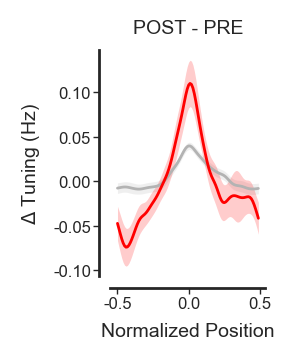

In [470]:
fig = plt.figure(figsize=(1, 1.5), dpi=200)
ax = fig.add_subplot(111)

bin_to_cm = grp[0].track_length / 1000.

stim_mean = np.nanmean(stim_diff, axis=0)
stim_sem = sem(stim_diff, axis=0)

nostim_mean = np.nanmean(nostim_diff, axis=0)
nostim_sem = sem(nostim_diff, axis=0)

x = np.arange(-50, 50) / 100.

# ax.axvline(0, color='k', ls='--')

ax.plot(x, nostim_mean, color='0.7', lw=1)
ax.fill_between(x, nostim_mean-nostim_sem, nostim_mean+nostim_sem, color='0.7', alpha=0.2, lw=0)
ax.plot(x, stim_mean, color='r', lw=1)
ax.fill_between(x, stim_mean-stim_sem, stim_mean+stim_sem, color='r', alpha=0.2, lw=0)

clean(ax, offset=4)
ax.set_xlabel('Normalized Position')
ax.set_ylabel('$\Delta$ Tuning (Hz)')
ax.set_title('POST - PRE')

fig.savefig(save_dir + 'tuning_difference.svg', bbox_inches='tight')

Text(0.5,1,'POST - PRE')

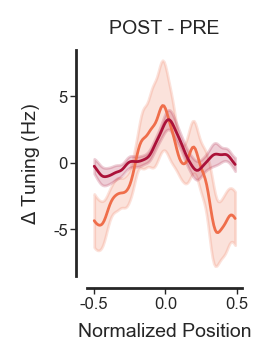

In [406]:
fig = plt.figure(figsize=(1, 1.5), dpi=200)
ax = fig.add_subplot(111)

bin_to_cm = grp[0].track_length / 1000.

low_td = low_diff / grp[0].frame_period()
med_td = med_diff / grp[0].frame_period()

low_mean = np.nanmean(low_td, axis=0)
low_sem = sem(low_td, axis=0)

med_mean = np.nanmean(med_td, axis=0)
med_sem = sem(med_td, axis=0)

x = np.arange(-50, 50) / 100.

# ax.axvline(0, color='k', ls='--')

ax.plot(x, low_mean, color=colors[0], lw=1)
ax.fill_between(x, low_mean-low_sem, low_mean+low_sem, color=colors[0], alpha=0.2)
ax.plot(x, med_mean, color=colors[1], lw=1)
ax.fill_between(x, med_mean-med_sem, med_mean+med_sem, color=colors[1], alpha=0.2)

clean(ax, offset=4)
ax.set_xlabel('Normalized Position')
ax.set_ylabel('$\Delta$ Tuning (Hz)')
ax.set_title('POST - PRE')

# fig.savefig(save_dir + 'tuning_difference.svg', bbox_inches='tight')

## Data Functions

In [83]:
def activity_centroids_split(grps, stim_filter,
                            labels=['Low', 'Mid']):
    
    sessions = ['baseline', 'induction', '24h']

    session_name_dict = {'induction': 'POST',
                         'baseline': 'PRE',
                         '24h': '24H'}

    df = pd.DataFrame([])

    for grp, label in zip(grps, labels):
        condition = grp[0].session.split('_')[0]
        for session in sessions:

            sess_grp = [x._get_session(condition + '_' + session) for x in grp]
            sess_grp = pcExperimentGroup(sess_grp, **grp.args)

            stim_session = condition + '_induction'

            sess_df = ia.activity_centroid_distance(sess_grp, roi_filter=stim_filter, stim_session=stim_session)
            sess_df['split'] = label
            sess_df['session'] = session_name_dict[session]

            df = pd.concat([df, sess_df])
    
    return df

In [6]:
def activity_centroids(grp, stim_filter, 
                            nostim_filter=None):
    
    full_sessions = ['control_baseline', 'control_induction', 'control_24h']

    session_name_dict = {'induction': 'POST',
                         'baseline': 'PRE',
                         '24h': '24H'}

    if not nostim_filter:
        nostim_filter = lambda x: not stim_filter(x)

    df = pd.DataFrame([])

    for session in full_sessions:

        sess_grp = [x._get_session(session) for x in grp]
        sess_grp = pcExperimentGroup(sess_grp, **grp.args)

        stim_session = session.split('_')[0] + '_induction'

        for stimmed, sfilter in zip(['stimmed', 'unstimmed'], [stim_filter, nostim_filter]):

            sess_df = ia.activity_centroid_distance(sess_grp, roi_filter=sfilter, stim_session=stim_session)
            sess_df['stimmed'] = stimmed
            sess_df['session'] = session_name_dict[session.split('_')[-1]]

            df = pd.concat([df, sess_df])
            
    return df

In [563]:
from scipy.ndimage import center_of_mass
from sima.ROI import mask2poly

def binarize_mask(roi, thres=0.2):
    mask = np.sum(roi.__array__(), axis=0)
    return mask > (np.max(mask) * thres)

def get_microns(expt):
    
    mags = {'svr141': (16, 1),
        'svr142': (16, 1.5),
        'svr143': (16, 1.5),
        'svr146': (16, 1),
        'svr147': (16, 1.5),
        'svr148': (16, 1),
        'svr153': (16, 1),
        'svr154': (16, 1),
        'svr157': (16, 1.5),
        'svr159': (16, 1.5),
        'svr160': (16, 1),
        'svr161': (16, 1),
        'svr162': (16, 1.5),
        'svr164': (16, 1),
        'svr179': (40, 1),
        'svr180': (16, 1),
        'svr182': (16, 1),
        'svr183': (16, 1.5)}

    mag_to_conversion = {
        (16, 1): 1.640625,
        (16, 1.5): 1.093750,
        (40, 1): 0.652580
    }
    
    mouse_name = expt.parent.mouse_name
    return mag_to_conversion[mags[mouse_name]]

def inter_roi_distances(rois, to_um):
    
    n_rois = len(rois)
    dists = np.zeros((n_rois, n_rois))
    
    polys = [mask2poly(binarize_mask(roi)) for roi in rois]
    
    for i in range(n_rois):
        for j in range(i):
            
            dists[i, j] = polys[i].distance(polys[j]) * to_um
            dists[j, i] = dists[i, j]
        
        dists[i, i] = np.nan
    
    return dists


def num_neighbors(grp, stim_filter, ind_filter):
            
    data_list = []      
    all_dists = []
    for expt in grp:

        eid = expt.trial_id
        mouse_name = expt.parent.mouse_name

        if mouse_name == 'svr179':
            continue
        um_per_pixel = get_microns(expt)

        if len(expt.rois(roi_filter=ind_filter)) == 0:
            continue
        if len(expt.rois(roi_filter=ind_filter)) == len(expt.rois(roi_filter=stim_filter)):
            continue

        rois = expt.rois(roi_filter=stim_filter)
        dists = inter_roi_distances(rois, um_per_pixel)

        all_dists.append(dists)

        for roi, dist in zip(rois, dists):

            for thresh in range(1, 200):

                data_list.append({'roi':roi.label,
                                  'expt_id': eid,
                                  'mouse_name':mouse_name,
                                  'mean_dist': np.nanmean(dist),
                                  'min_dist': np.nanmin(dist),
                                  'close_cells': len([x for x in dist if x < thresh]),
                                  'any_close_cells': len([x for x in dist if x < thresh]) > 0,
                                  'thresh': thresh,
    #                               'dists': dist,
                                  'ind': ind_filter(roi)})

    mean_dist = pd.DataFrame(data_list)
    grouped_dist = mean_dist.groupby(['mouse_name', 'expt_id', 'ind', 'thresh'], as_index=False).mean()
    grouped_dist.dropna(inplace=True)
    mean_dist.dropna(inplace=True)
    
    return mean_dist, grouped_dist

In [564]:
mean_dist, grouped_dist = num_neighbors(grp, stim_filter, ind_filter)

In [11]:
activity_centroid_df = activity_centroids(grp, stim_filter, nostim_filter)

In [17]:
activity_centroid_df.to_pickle(data_dir + 'activity_centroid_df.pkl')

In [18]:
ind_rate = ia.induction_rate(grp, stim_filter, ind_filter, nostim_filter, nostim_ind_filter)

In [19]:
ind_rate.to_pickle(data_dir + 'ind_rate.pkl')

In [3]:
ind_rate = pd.read_pickle(data_dir + 'ind_rate.pkl')

In [6]:
ind_rate['pct_stimmed'].median()

0.02857064420233585

In [13]:
lows = ind_rate.loc[ind_rate['pct_stimmed'] < 0.02857064420233585]
meds = ind_rate.loc[ind_rate['pct_stimmed'] > 0.02857064420233585]

In [23]:
print lows['pct_stimmed'].min()
print lows['pct_stimmed'].max()
print lows['n_stimmed'].min()
print lows['n_stimmed'].max()
print lows['n_stimmed'].mean()

0.0075
0.027837259100642397
2
13
4.77777777778


In [24]:
print meds['pct_stimmed'].min()
print meds['pct_stimmed'].max()
print meds['n_stimmed'].min()
print meds['n_stimmed'].max()
print meds['n_stimmed'].mean()

0.029304029304029304
0.08895705521472393
4
49
22.6666666667


In [391]:
fracs = []
for expt in grp:
    fracs.append(len(expt.rois(roi_filter=stim_filter)) / float(len(expt.rois(roi_filter=None))))
med_frac = np.nanmedian(fracs)

low_grp = pcExperimentGroup([x for x,f in zip(grp, fracs) if f < med_frac], label='Low', **pc_kwargs)
mid_grp = pcExperimentGroup([x for x,f in zip(grp, fracs) if f > med_frac], label='Mid', **pc_kwargs)
# activity_centroid_split_df = activity_centroids_split([low_grp, mid_grp], stim_filter)

In [403]:
low_diff = ia.tuning_difference(low_grp, roi_filter=stim_filter, by_mouse=False)
med_diff = ia.tuning_difference(mid_grp, roi_filter=stim_filter, by_mouse=False)

In [412]:
low_norm_diff = ia.tuning_difference(low_grp, roi_filter=stim_filter, by_mouse=False, normalize=True)
med_norm_diff = ia.tuning_difference(mid_grp, roi_filter=stim_filter, by_mouse=False, normalize=True)

In [87]:
activity_centroid_split_df.to_pickle(data_dir + 'activity_centroid_split_df.pkl')

In [24]:
activity_centroid_split_df = pd.read_pickle(data_dir + 'activity_centroid_split_df.pkl')

In [181]:
burst_df = ia.burst_size(grp, roi_filter=stim_filter, win=(1, 0.5), exclude_stim=True)
burst_df.to_pickle(data_dir + 'burst_df.pkl')

In [550]:
burst_df = pd.read_pickle(data_dir + 'burst_df.pkl')

In [7]:
low_activity_centroid_df = activity_centroids(low_grp, stim_filter, nostim_filter)
med_activity_centroid_df = activity_centroids(mid_grp, stim_filter, nostim_filter)

In [9]:
low_activity_centroid_df['class'] = 'Low'
med_activity_centroid_df['class'] = 'Med'

In [10]:
full_activity_centroid_df = pd.concat([low_activity_centroid_df, med_activity_centroid_df])

In [13]:
full_activity_centroid_df.to_pickle(data_dir + 'full_activity_centroid_df.pkl')

In [473]:
full_activity_centroid_df = pd.read_pickle(data_dir + 'full_activity_centroid_df.pkl')

## Rebuttal: Over-representation

In [531]:
pc_filter = grp.pcs_filter(roi_filter=stim_filter)

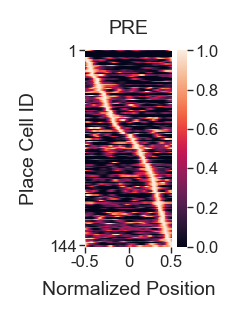

In [569]:
def name_pc_filter(grp, pc_filter):
    rlist = []
    for expt in grp:
        rois = expt.rois(roi_filter=pc_filter)
        rlist.extend([r.label for r in rois])
    
    return lambda x: x.label in rlist

bpc_filter = name_pc_filter(grp, pc_filter)

bgrp = pcExperimentGroup([x._get_session('control_baseline') for x in grp], **grp.args)
data = bgrp.data(roi_filter=bpc_filter)

tcs = []
for expt, bexpt in zip(grp, bgrp):
    edata = data[bexpt]
    shift = 50 - int(expt._get_stim_positions(units='normalized')[0])
    tcs.append(np.roll(edata, shift, axis=1) / expt.frame_period())

tcs = np.vstack(tcs)

sort_idx = np.argsort(np.argmax(tcs, axis=1))[::-1]
tcs = tcs[sort_idx[::-1], :]
tcs = tcs / np.nanmax(tcs, axis=1, keepdims=True)

fig = plt.figure(figsize=(0.7, 1.3), dpi=200)
ax = fig.add_subplot(111)

sns.heatmap(np.nan_to_num(tcs), rasterized=True)
clean(ax, full=True)
ax.set_xticks([0, 50, 99])
ax.set_xticklabels([-0.5, 0, 0.5], rotation=0)
ax.set_yticks([0, len(tcs) - 1])
ax.set_yticklabels([1, len(tcs)])
ax.set_title('PRE')
ax.set_ylabel('Place Cell ID')
ax.set_xlabel('Normalized Position')

fig.savefig(save_dir + 'pre_overrep.svg')

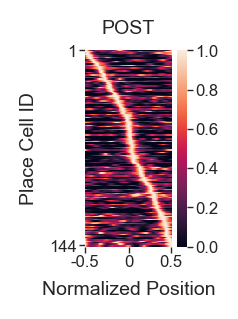

In [570]:
tcs = []
data = grp.data(roi_filter=pc_filter)

for expt in grp:
    edata = data[expt]
    shift = 50 - int(expt._get_stim_positions(units='normalized')[0])
    tcs.append(np.roll(edata, shift, axis=1) / expt.frame_period())

tcs = np.vstack(tcs)

sort_idx = np.argsort(np.argmax(tcs, axis=1))[::-1]
tcs = tcs[sort_idx[::-1], :]
tcs = tcs / np.nanmax(tcs, axis=1, keepdims=True)

fig = plt.figure(figsize=(0.7, 1.3), dpi=200)
ax = fig.add_subplot(111)

sns.heatmap(np.nan_to_num(tcs), rasterized=True)
clean(ax, full=True)
ax.set_xticks([0, 50, 99])
ax.set_xticklabels([-0.5, 0, 0.5], rotation=0)
ax.set_yticks([0, len(tcs) - 1])
ax.set_yticklabels([1, len(tcs)])
ax.set_title('POST')
ax.set_ylabel('Place Cell ID')
ax.set_xlabel('Normalized Position')

fig.savefig(save_dir + 'post_overrep.svg')